## Clustering stock market share price data using k-Means and SVM
Loading the necessary libraries and functions

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Downloading the stock market data from "Morningstar" using datareader in pandas

In [2]:
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',
'Navistar': 'NAV',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'Symantec': 'SYMC',
'American Express': 'AXP',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Toyota': 'TM',
'Honda': 'HMC',
'Sony': 'SNE',
'Exxon': 'XOM',
'Chevron': 'CVX',
'Valero Energy': 'VLO',
'Ford': 'F',
'Bank of America': 'BAC'}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

# Source of data
data_source = 'iex'

# Start and End dates of interval of data required
start_date = '2015-01-01'
end_date = '2017-12-31'

panel_data = data.DataReader(companies_dict.values(), data_source, start_date, end_date).unstack(level=0)

# Print Axes Labels
print(panel_data.axes)

# Find Stock Open and Close Values
stock_close = panel_data['close']
stock_open = panel_data['open']

print(stock_close.iloc[0])
print(stock_open.iloc[0])

[MultiIndex(levels=[[u'open', u'high', u'low', u'close', u'volume'], [u'AAPL', u'AMZN', u'AXP', u'BA', u'BAC', u'CVX', u'F', u'GE', u'HMC', u'IBM', u'INTC', u'JNJ', u'KO', u'LMT', u'MA', u'MCD', u'MSFT', u'NAV', u'NOC', u'PEP', u'SNE', u'SYMC', u'TM', u'TXN', u'VLO', u'WBA', u'XOM'], [u'2015-01-02', u'2015-01-05', u'2015-01-06', u'2015-01-07', u'2015-01-08', u'2015-01-09', u'2015-01-12', u'2015-01-13', u'2015-01-14', u'2015-01-15', u'2015-01-16', u'2015-01-20', u'2015-01-21', u'2015-01-22', u'2015-01-23', u'2015-01-26', u'2015-01-27', u'2015-01-28', u'2015-01-29', u'2015-01-30', u'2015-02-02', u'2015-02-03', u'2015-02-04', u'2015-02-05', u'2015-02-06', u'2015-02-09', u'2015-02-10', u'2015-02-11', u'2015-02-12', u'2015-02-13', u'2015-02-17', u'2015-02-18', u'2015-02-19', u'2015-02-20', u'2015-02-23', u'2015-02-24', u'2015-02-25', u'2015-02-26', u'2015-02-27', u'2015-03-02', u'2015-03-03', u'2015-03-04', u'2015-03-05', u'2015-03-06', u'2015-03-09', u'2015-03-10', u'2015-03-11', u'2015-03

In [8]:
# Calculate daily stock movement
stock_close_arr = np.array(stock_close.unstack(level=-1))
stock_open_arr = np.array(stock_open.unstack(level=-1))

row, col = stock_close_arr.shape

movements = np.zeros([row, col])

for i in range(0, row):
    movements[i,:] = np.subtract(stock_close_arr[i,:], stock_open_arr[i,:])

for i in range(0, len(companies)):
   print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))
    
# print(movements.shape)

Company: Apple, Change: 17.7698
Company: Amazon, Change: -83.065
Company: American Express, Change: 8.2997
Company: Boeing, Change: 109.6008
Company: Bank of America, Change: -4.1267
Company: Chevron, Change: 21.1619
Company: Ford, Change: -4.6325
Company: General Electrics, Change: 4.18
Company: Honda, Change: -8.4724
Company: IBM, Change: 15.8046
Company: Intel, Change: 17.8975
Company: Johnson & Johnson, Change: 29.0792
Company: Coca Cola, Change: 12.6326
Company: Lockheed Martin, Change: 62.9277
Company: MasterCard, Change: 24.4523
Company: McDonalds, Change: 50.634
Company: Microsoft, Change: 26.7188
Company: Navistar, Change: 0.2
Company: Northrop Grumman, Change: 78.3236
Company: Pepsi, Change: 37.4575
Company: Sony, Change: 3.5997
Company: Symantec, Change: 13.6451
Company: Toyota, Change: -18.8224
Company: Texas Instruments, Change: 27.4606
Company: Valero Energy, Change: 27.8236
Company: Walgreen, Change: -5.6202
Company: Exxon, Change: 8.7917


## Clustering using Normalizer and k-Means

In [12]:
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10, max_iter=1000, n_init=15)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)
print(kmeans.inertia_)
labels = pipeline.predict(movements)
df = pd.DataFrame({'companies':companies, 'labels':labels})
print(df.sort_values('labels'))

9.120050975209848
                   companies  labels
0              (Apple, AAPL)       0
23  (Texas Instruments, TXN)       0
10             (Intel, INTC)       0
18   (Northrop Grumman, NOC)       1
13    (Lockheed Martin, LMT)       1
6                  (Ford, F)       2
7    (General Electrics, GE)       2
8               (Honda, HMC)       2
9                 (IBM, IBM)       2
3               (Boeing, BA)       2
24      (Valero Energy, VLO)       2
22              (Toyota, TM)       2
20               (Sony, SNE)       2
4     (Bank of America, BAC)       2
2    (American Express, AXP)       2
11  (Johnson & Johnson, JNJ)       3
5             (Chevron, CVX)       4
26              (Exxon, XOM)       4
16         (Microsoft, MSFT)       5
14          (MasterCard, MA)       5
21          (Symantec, SYMC)       5
1             (Amazon, AMZN)       5
15          (McDonalds, MCD)       6
19              (Pepsi, PEP)       7
12           (Coca Cola, KO)       7
17           (Navist

## Visualization of clustering with dimensionality reduction using PCA

                   companies  labels
24      (Valero Energy, VLO)       0
2    (American Express, AXP)       0
22              (Toyota, TM)       0
8               (Honda, HMC)       0
9                 (IBM, IBM)       0
13    (Lockheed Martin, LMT)       1
19              (Pepsi, PEP)       1
18   (Northrop Grumman, NOC)       1
11  (Johnson & Johnson, JNJ)       1
12           (Coca Cola, KO)       1
23  (Texas Instruments, TXN)       2
21          (Symantec, SYMC)       2
14          (MasterCard, MA)       2
0              (Apple, AAPL)       2
5             (Chevron, CVX)       3
26              (Exxon, XOM)       3
3               (Boeing, BA)       4
25           (Walgreen, WBA)       4
17           (Navistar, NAV)       5
6                  (Ford, F)       5
4     (Bank of America, BAC)       5
10             (Intel, INTC)       6
20               (Sony, SNE)       6
15          (McDonalds, MCD)       7
16         (Microsoft, MSFT)       8
1             (Amazon, AMZN)       8
7

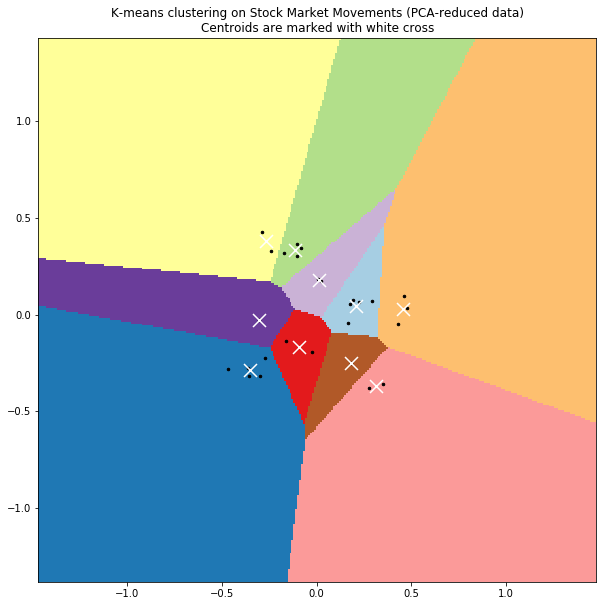

In [13]:
reduced_data = PCA(n_components=2).fit_transform(normalizer.fit_transform(movements))
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

df = pd.DataFrame({'labels': labels, 'companies': companies})
print(df.sort_values('labels'))

# Step size of the mesH
h = .01

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()